In [33]:
from games.mp import MP
from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent
import matplotlib.pyplot as plt
import numpy as np
from agents.regretmatching import RegretMatching

In [34]:
g = MP()
g.reset()

In [3]:
fp = dict(map(lambda agent: (agent, FictitiousPlay(game=g, agent=agent)), g.agents))

In [4]:
for i in range(100000):
    actions = dict(map(lambda agent: (agent, fp[agent].action()), g.agents))
    g.step(actions)

In [5]:
dict(map(lambda agent: (agent, fp[agent].policy()), g.agents))

{'agent_0': array([0.49962501, 0.50037499]),
 'agent_1': array([0.50186978, 0.49813022])}

In [37]:
def play(agents_config, steps):
    g.reset()
    
    rewards = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    moves = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    policies = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    for i in range(steps):
        actions = dict(map(lambda agent: (agent, agents_config[agent][1].action()), g.agents))
        g.step(actions)

        for agent_id in g.agents:
            r = g.reward(agent_id)
            rewards[agent_id].append(r)
            policies[agent_id].append(agents_config[agent_id][1].policy().copy())
            moves[agent_id].append(actions[agent_id])

        for _, ag in agents_config.values():
            ag.step_update()
    
    _, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    # Cumulative average result
    agent1_avg = np.cumsum(rewards[g.agents[0]]) / np.arange(1, len(rewards[g.agents[0]]) + 1)
    agent2_avg = np.cumsum(rewards[g.agents[1]]) / np.arange(1, len(rewards[g.agents[1]]) + 1)
    axes[0].plot(agent1_avg, label=agents_config[g.agents[0]][0])
    axes[0].plot(agent2_avg, label=agents_config[g.agents[1]][0])
    axes[0].set_title('Cumulative average over time')
    axes[0].legend()

    # Agent 1 actions
    axes[1].set_xlabel('timesteps')
    axes[1].set_ylabel('actions')
    axes[1].plot(moves[g.agents[0]])
    axes[1].set_yticks(np.arange(len(g._moves)), g._moves)
    axes[1].set_title(f'{agents_config[g.agents[0]][0]} actions over time')

    # Agent 2 actions
    axes[2].set_xlabel('timesteps')
    axes[2].set_ylabel('actions')
    axes[2].plot(moves[g.agents[1]])
    axes[2].set_yticks(np.arange(len(g._moves)), g._moves)
    axes[2].set_title(f'{agents_config[g.agents[1]][0]} actions over time')


    # Agent 1 policy (or empirical action distributions)
    #x = [p[0] for p in policies[g.agents[0]]]
    #y = [p[1] for p in policies[g.agents[0]]]
    #axes[1].plot(x, y)
    #axes[1].set_title('Agent 1 policy (or empirical action distributions)')
    #axes[1].set_xlabel(('$\\pi_1(H)$'))
    #axes[1].set_ylabel(('$\\pi_1(T)$'))

    # Agent 1 policy (or empirical action distributions)
    #x = [p[0] for p in policies[g.agents[1]]]
    #y = [p[1] for p in policies[g.agents[1]]]
    #axes[2].plot(x, y)
    #axes[2].set_title('Agent 2 policy (or empirical action distributions)')
    #axes[2].set_xlabel(('$\\pi_2(H)$'))
    #axes[2].set_ylabel(('$\\pi_2(T)$'))

    for ax in axes:
        ax.grid(True)

    plt.tight_layout()
    plt.show()


### FP vs FP

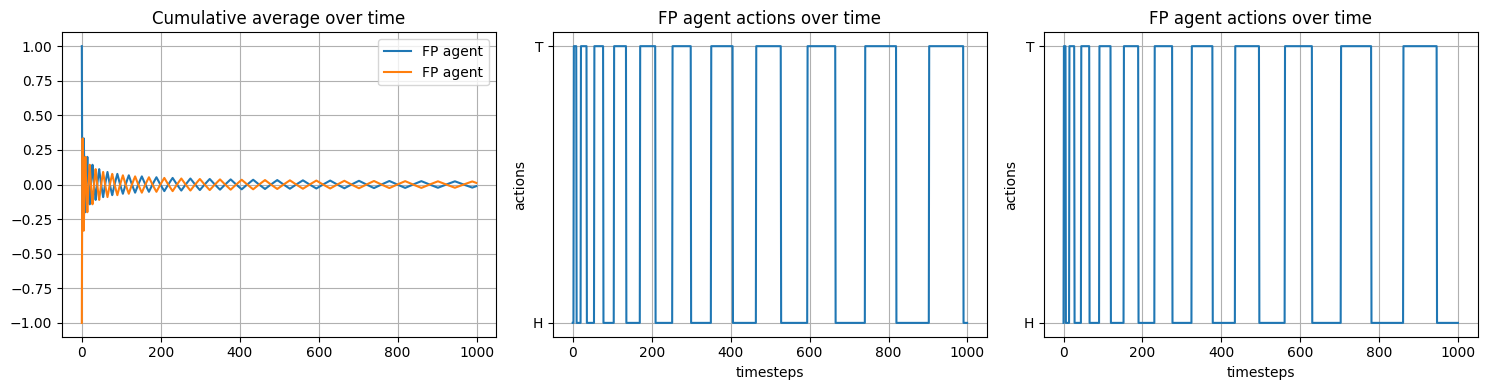

[0.48248248 0.51751752]
[0.5045045 0.4954955]


In [39]:
fp_vs_fp = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[1])),
}

play(fp_vs_fp, 1000)

print(fp_vs_fp[g.agents[0]][1].policy())
print(fp_vs_fp[g.agents[1]][1].policy())

### FP vs RM

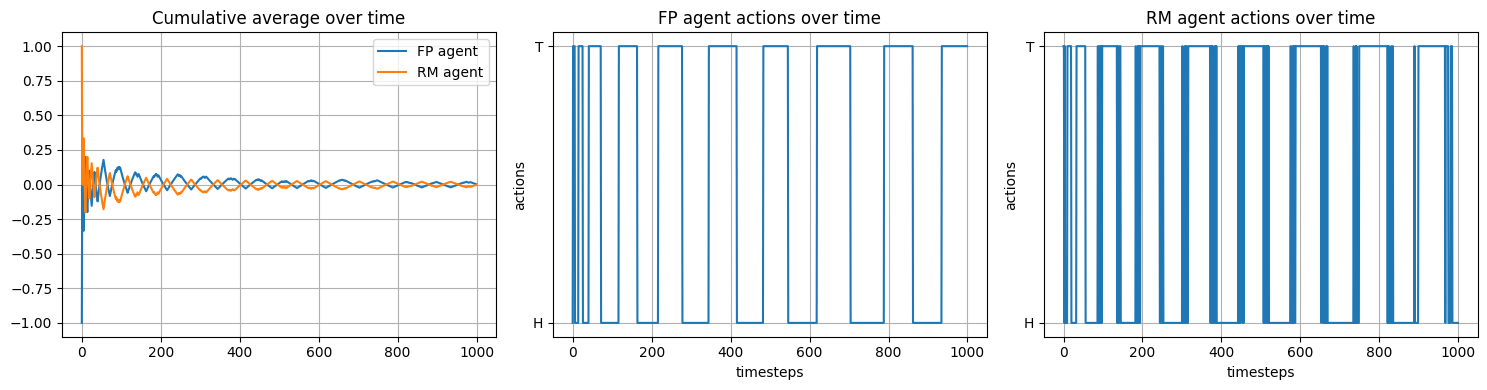

[0.48848849 0.51151151]
[0.4895052 0.5104948]


In [45]:
fp_vs_rm = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('RM agent', RegretMatching(game=g, agent=g.agents[1])),
}

play(fp_vs_rm, 1000)

print(fp_vs_rm[g.agents[0]][1].policy())
print(fp_vs_rm[g.agents[1]][1].policy())

### FP vs Random

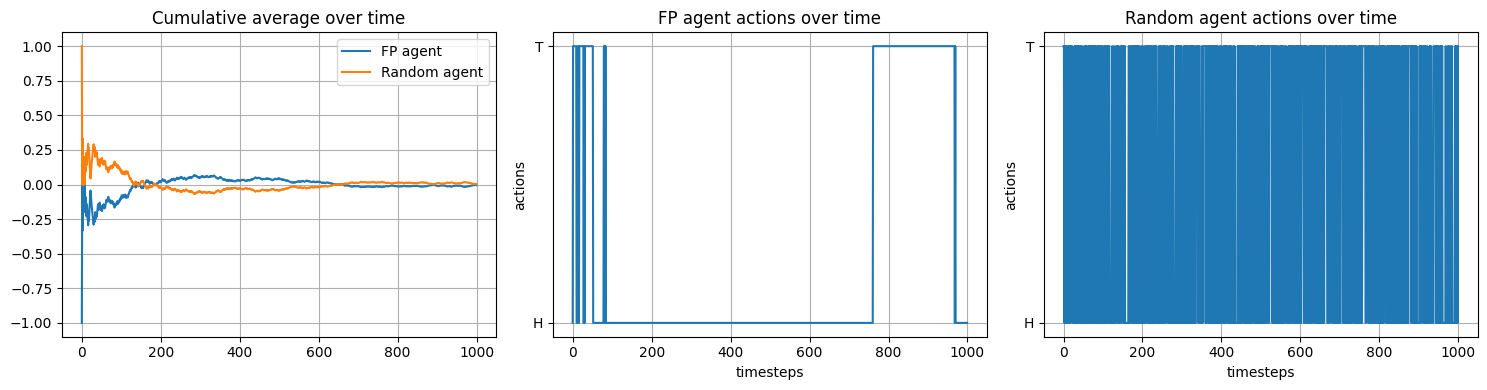

[0.74274274 0.25725726]
[0.5 0.5]


In [57]:
fp_vs_random = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('Random agent', RandomAgent(game=g, agent=g.agents[1])),
}

play(fp_vs_random, 1000)

print(fp_vs_random[g.agents[0]][1].policy())
print(fp_vs_random[g.agents[1]][1].policy())

### RM vs RM

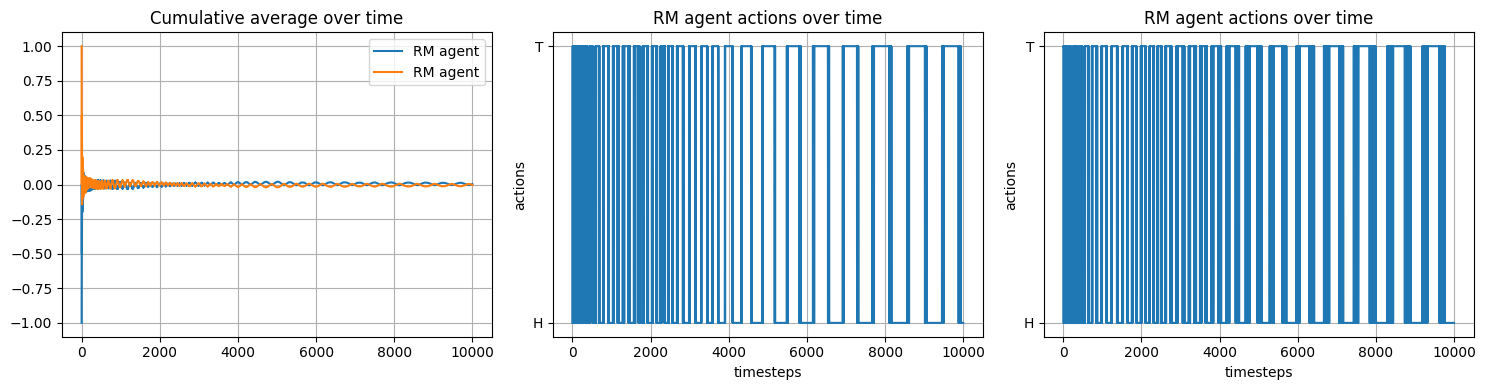

[0.49439722 0.50560278]
[0.50479992 0.49520008]


In [46]:
rm_vs_rm = {
    g.agents[0]: ('RM agent', RegretMatching(game=g, agent=g.agents[0])),
    g.agents[1]: ('RM agent', RegretMatching(game=g, agent=g.agents[1])),
}

play(rm_vs_rm, 10000)

print(rm_vs_rm[g.agents[0]][1].policy())
print(rm_vs_rm[g.agents[1]][1].policy())

### RM vs Random

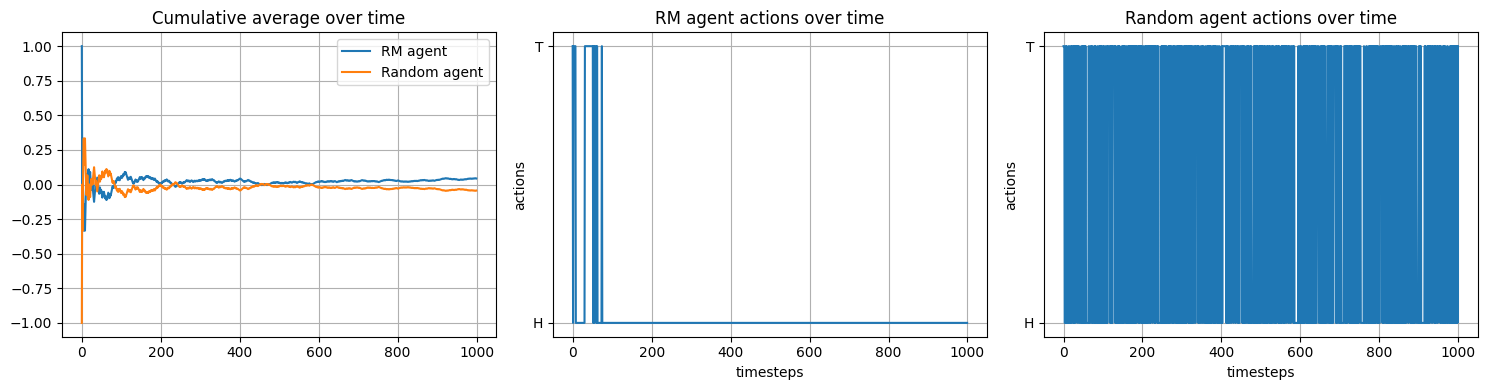

[0.96375952 0.03624048]
[0.5 0.5]


In [55]:
rm_vs_random = {
    g.agents[0]: ('RM agent', RegretMatching(game=g, agent=g.agents[0])),
    g.agents[1]: ('Random agent', RandomAgent(game=g, agent=g.agents[1])),
}

play(rm_vs_random, 1000)

print(rm_vs_random[g.agents[0]][1].policy())
print(rm_vs_random[g.agents[1]][1].policy())